In [16]:
  from tensorflow.keras.datasets import imdb
(train_data_, train_labels_), (test_data_, test_labels_) = imdb.load_data(
    num_words=10000)



In [17]:
train_data_[0]


[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
train_labels_[0]

1

In [19]:
max([max(sequence) for sequence in train_data_])


9999

In [20]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data_[0]])

In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [22]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers


model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64,activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

In [24]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.5263 - accuracy: 0.7259 - val_loss: 0.2757 - val_accuracy: 0.8448
Epoch 2/20
30/30 [==============================] - 3s 101ms/step - loss: 0.2158 - accuracy: 0.8549 - val_loss: 0.1820 - val_accuracy: 0.8431
Epoch 3/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1475 - accuracy: 0.8801 - val_loss: 0.1638 - val_accuracy: 0.8420
Epoch 4/20
30/30 [==============================] - 2s 58ms/step - loss: 0.1287 - accuracy: 0.8902 - val_loss: 0.1473 - val_accuracy: 0.8567
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1179 - accuracy: 0.8986 - val_loss: 0.1557 - val_accuracy: 0.8430
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1117 - accuracy: 0.9061 - val_loss: 0.1234 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 0.1097 - accuracy: 0.9049 - val_loss: 0.1278 - val_accuracy: 0.8773
Epoch 8/20


In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

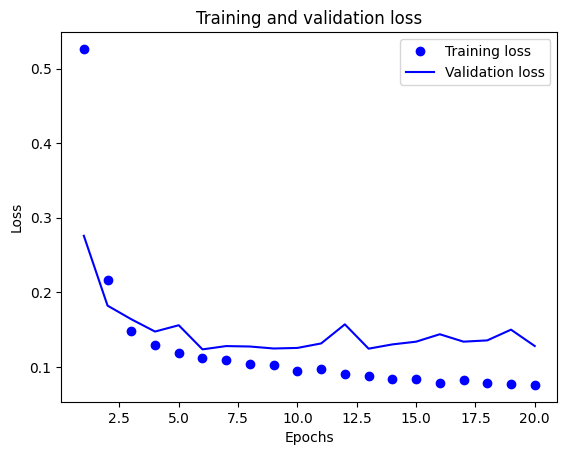

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

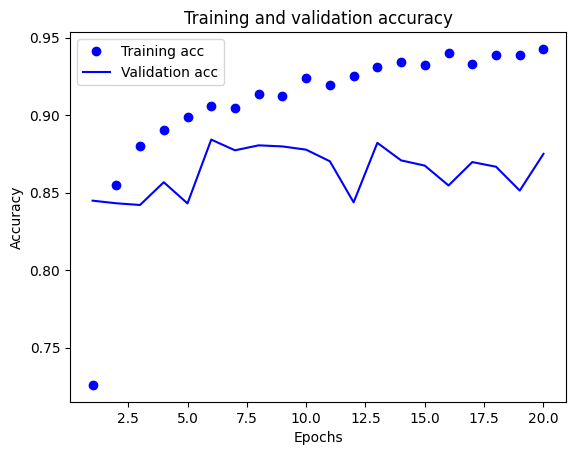

In [29]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [30]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.1341 - accuracy: 0.8691


In [ ]:
results

[0.1378220170736313, 0.8629199862480164]

In [ ]:
model = keras.Sequential([
    layers.Dense(64,kernel_regularizer=regularizers.l2(0.005),activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(64, activation="tanh"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 6s 84ms/step - loss: 0.3447 - accuracy: 0.7892
Epoch 2/4
49/49 [==============================] - 3s 57ms/step - loss: 0.1526 - accuracy: 0.8887
Epoch 3/4
49/49 [==============================] - 3s 56ms/step - loss: 0.1460 - accuracy: 0.8964
Epoch 4/4
782/782 [==============================] - 5s 6ms/step - loss: 0.1653 - accuracy: 0.8715


In [31]:
results

[0.1341206282377243, 0.8690800070762634]